<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Campeonato_Brasileiro_de_Futebol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt='Logo Campeonato Brasileiro de Futebol' width='20%' src='https://github.com/leonarddocchagas/data_science/blob/master/projetos/campeonato_brasileiro_de_futebol/Campeonato_Brasileiro_S%C3%A9rie_A_logo.png?raw=true' />

##**Analisando o Campeonato Brasileiro de Futebol**

O Campeonato Brasileiro de Futebol é a principal liga de futebol profissionao do Brasil. Se comparado com outros campeonatos pelo mundo, o "Brasileirão", como é popularmente conhecido, é relativamente recente. Isso ocorreu, por conta da dimensões continetáis do país. 

No início, o interesse pela competição era baixo e o campeonato era dispultado pelas selecões dos estados, ficando limitado entre Rio-São Paulo. Assim permanete até por volta de 1966. 

Em 1971, o campeonato é reformulado e começa ganhar adeptos e clubes de outros estados como de Pernambuco, Bahia, Minas. O Atlético Mineiro foi campeão e é até hoje, considerado o primeiro campeão da nova formula.  

## Sobre os dados

Os dados que iremos usar, foram extraídos do Kaggle. Não encontramos dad
  * Kaggle
    * https://www.kaggle.com/adaoduque/campeonato-brasileiro-de-futebol

**Dicionário de dados**

`Horário`:  Horário que ocorreu a partida                     
`Dia`: Dia da semana que ocorreu a partida                      
`Data`: Data que ocorreu a partida                      
`Clube 1` : Clube mandante                      
`Clube 2` : Clube Visitante                      
`Vencedor` : Clube vencedor da partida. Quando tiver "-", é um empate

`Rodada` : Rodada que aconteceu a partida                      
`Arena` : Arena que ocorreu a partida                      
`Clube 1 Gols` : Gols que o clube mandante fez na partida                      
`Clube 2 Gols` : Gols que o clube visitante fez na partida                      
`Clube 1 Estado` : Estado do clube mandatorio                      
`Clube 2 Estado` : Estado do clube visitante                      
`Estado Clube Vencedor` : Estado do clube vencedor. Quando tiver "Empate", deu empate viu! 

## Obtenção dos Dados

In [ ]:
# import bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# carrega dataset 
df = pd.read_csv('/content/drive/My Drive/Colab Data Science/Projetos/Campeonato Brasileiro de Futebol/campeonato-brasileiro.csv')

# exibi as primeiras 5 linhas
df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [ ]:
# tamanho dataset
print('Tamanho dataset')
print('Variáveis: {}' .format(df.shape[1]))
print('Entradas: {}' .format(df.shape[0]))

Tamanho dataset
Variáveis: 13
Entradas: 7939


In [ ]:
# verificando dados ausentes
df.isnull().sum()

Horário                  357
Dia                        0
Data                       0
Clube 1                    0
Clube 2                    0
Vencedor                   0
Rodada                     0
Arena                      0
Clube 1 Gols               0
Clube 2 Gols               0
Clube 1 Estado             0
Clube 2 Estado             0
Estado Clube Vencedor      0
dtype: int64

In [ ]:
# tipo dos dados
df.dtypes

Horário                  object
Dia                      object
Data                     object
Clube 1                  object
Clube 2                  object
Vencedor                 object
Rodada                   object
Arena                    object
Clube 1 Gols              int64
Clube 2 Gols              int64
Clube 1 Estado           object
Clube 2 Estado           object
Estado Clube Vencedor    object
dtype: object

In [ ]:
# informações estatísticas
df.describe()

,Clube 1 Gols,Clube 2 Gols
count,7939.000000,7939.000000
mean,1.596801,1.052526
std,1.251372,1.039719
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,7.000000


Como em nosso dataset não existe uma coluna `ano`, resolvi adicionar para termos uma noção de quantidade de jogos anual.

In [ ]:
# converte coluna data para datatime
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
# cria coluna ano
df['Ano'] = df.Data.dt.year

In [ ]:
df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor,Ano
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ,2000
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE,2000
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES,2000
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate,2000
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate,2000


Em nosso dataset, a quantidade de gols é contabilizado em colunas separadas `Clube 1 Gols` e `Clube 2 Gols`. Vamos criar uma única coluna, somando as duas para termos um total de gols por jogos. 

In [ ]:
# criando coluna quantiade de gols por jogos
df['Qtde_Gols'] = df['Clube 1 Gols'] + df['Clube 2 Gols']
df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor,Ano,Qtde. Gols,Qtde_Gols
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ,2000,2,2
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE,2000,2,2
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES,2000,5,5
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate,2000,0,0
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate,2000,2,2


## Vizualizando os dados

In [ ]:
print('Os dados analisados é de {} e vai até {} ou seja, {} anos de informação.' .format(df.Ano.min(), df.Ano.max(), df.Ano.nunique()))

Os dados analisados é de 2000 e vai até 2019 ou seja, 20 anos de informação.


In [ ]:
df.Ano.value_counts().sort_index()

2000    329
2001    387
2002    337
2003    552
2004    552
2005    462
2006    380
2007    383
2008    377
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
2019    380
Name: Ano, dtype: int64

Interessante observar que, de 2000 até 2008, os jogos não seguiam um padrão em relação ao números de jogos. Perceba que, variava ano pós ano e, só a partir de 2009, que o campeonato seguiu com a mesma quantidade de jogos. 

In [ ]:
# ranking maiores vencedores de jogos
df['Vencedor'].str.capitalize().value_counts() 

-                  2040
São paulo           348
Cruzeiro            326
Santos              325
Grêmio              308
Internacional       303
Flamengo            299
Corinthians         296
Fluminense          292
Athlético-pr        291
Atlético-mg         282
Palmeiras           280
Botafogo-rj         231
Vasco               220
Goiás               214
Coritiba            187
Vitória             152
Figueirense         151
Ponte preta         150
Sport               129
Bahia               123
Paraná              104
São caetano         103
Juventude            96
Chapecoense          69
Guarani              63
Portuguesa           58
Avaí                 57
Náutico              54
Fortaleza            51
Criciúma             50
Paysandu             50
Ceará                40
Atlético-go          39
América-mg           38
Santa cruz           25
Gama                 21
Barueri              12
Santo andré          11
Brasiliense          10
Ipatinga              9
Csa             

In [ ]:
# uf que mais venceu
df['Estado Clube Vencedor'].value_counts()

Empate    2040
SP        1659
RJ        1042
RS         707
MG         655
PR         582
SC         334
GO         253
PE         208
ES         152
BA         123
CE          91
PA          50
DF          31
AL           8
RN           4
Name: Estado Clube Vencedor, dtype: int64

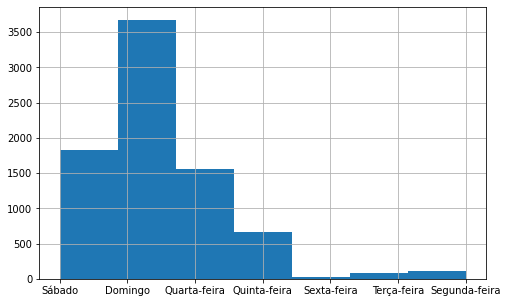

In [ ]:
# distribuição de jogos por dia da semana
df.Dia.hist(bins=7, figsize=(8,5));

## **Conclusão**

Infelizmente, nosso dataset não continha uma grande variedade de variáveis. Mas, conseguimos exatrir algumas informações relevantes como:
  * **Padrão na quantidade de jogos;** vimos que ao longo de 20 anos, a quantidade de jogos mudava de um campeonato para o outro. Só não sabemos o motivo.
  * **Maior vencedor;** é o São Paulo com 348 vitórias, seguido de Cruzeiro com 326 e Santos com 325.
  * **Maior UF vencedor;** SP é o estado com maior número de vitórias, um total de 1.659, seguido de RJ com 1.042 e RS com 707. 